<a href="https://colab.research.google.com/github/andreafalcon05-collab/Inteligencia-Artificial/blob/main/Multicapa_Expo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Clasificación de vacantes de PyMES

In [2]:
import pandas as pd
import numpy as np
#Genrerar Dataset por rangos
n_muestras=5000
#Vacante por area funcional (departamental): 70-100
adm_fin= np.random.randint(70,101,(n_muestras,3))
com_vent=np.random.randint(70,101,(n_muestras,3))
oper=np.random.randint(70,101,(n_muestras,3))
mark_com=np.random.randint(70,101,(n_muestras,3))
RRHH=np.random.randint(70,101,(n_muestras,3))
tec_inf=np.random.randint(70,101,(n_muestras,3))
#Vacante por Nivel Jerarquico:60,90
aux=np.random.randint(60,91,(n_muestras,3))
prof=np.random.randint(60,91,(n_muestras,3))
coor=np.random.randint(60,91,(n_muestras,3))
dirc=np.random.randint(60,91,(n_muestras,3))
#Nombres de columnas
columnas=[
  'Contador General', 'Auxiliar Contable','Jefe de Cobranza',
  'Ejecutivo de Ventas','Gerente Comercial','Key Account Manager',
  'Supervisor de Planta','Operario Especializado', 'Control de Calidad',
  'Community Manager','Especialista en Contenido Digital','Coordinador de Marketing',
  'Generalista de RR.HH.','Auxiliar de Nómina','Encargado de Reclutamiento',
  'Soporte Técnico','Desarrollador Junior','Administrador de Redes',
  'Asistente Administrativo','Cajero','Auxiliar de Limpieza',
  'Analista Contable','Ejecutivo de Cuentas','Diseñador Gráfico',
  'Supervisor de Producción','Coordinador de Marketing','Jefe de Almacén',
  'Gerente de Ventas', 'Director de Operaciones', 'Director Administrativo'
]
#crear dataframe
df=pd.DataFrame(np.concatenate([adm_fin,com_vent,oper,mark_com,RRHH,tec_inf,aux,prof,coor,dirc], axis=1), columns=columnas)

In [3]:
#calcular promedio por grupo y promedio total
prom_adm_fin=df[['Contador General', 'Auxiliar Contable','Jefe de Cobranza']].mean(axis=1)
prom_com_vent=df[['Ejecutivo de Ventas','Gerente Comercial','Key Account Manager']].mean(axis=1)
prom_oper=df[['Supervisor de Planta','Operario Especializado', 'Control de Calidad']].mean(axis=1)
prom_mark_com=df[['Community Manager','Especialista en Contenido Digital','Coordinador de Marketing']].mean(axis=1)
prom_RRHH=df[['Generalista de RR.HH.','Auxiliar de Nómina','Encargado de Reclutamiento']].mean(axis=1)
prom_tec_inf=df[['Soporte Técnico','Desarrollador Junior','Administrador de Redes']].mean(axis=1)
prom_aux=df[['Asistente Administrativo','Cajero','Auxiliar de Limpieza']].mean(axis=1)
prom_prof=df[['Analista Contable','Ejecutivo de Cuentas','Diseñador Gráfico']].mean(axis=1)
prom_coor=df[['Supervisor de Producción','Coordinador de Marketing']].mean(axis=1)
prom_dirc=df[['Jefe de Almacén','Gerente de Ventas', 'Director de Operaciones', 'Director Administrativo']].mean(axis=1)
#promedio total=total de los 10 prom
prom_total=(prom_adm_fin+prom_com_vent+prom_oper+prom_mark_com+prom_RRHH+prom_tec_inf+prom_aux+prom_prof+prom_coor+prom_dirc)/10
#etiquetas
y=(prom_total>50).astype(int)
#one-hot enconding
y=pd.get_dummies(y).values

Obtenemos conjunto de entramiento y de test

In [4]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=42)
#escalamiento
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Red Neuronal

In [5]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
modelo=Sequential([
    Dense(64, input_shape=(X_train.shape[1],),activation='relu'),
    Dense(32, activation='relu'),
    Dense(16, activation='relu'),
    Dense(2, activation='softmax')
])
adam=Adam(learning_rate=0.001)
modelo.compile(optimizer=adam, loss='sparse_categorical_crossentropy', metrics=['accuracy'])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/dense.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Entrenamiento

In [6]:
history= modelo.fit(
    X_train, y_train,
    epochs=10,
    batch_size=8,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 5s 4ms/step - accuracy: 0.9938 - loss: 0.0903 - val_accuracy: 1.0000 - val_loss: 1.4516e-04
Epoch 2/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.1676e-04 - val_accuracy: 1.0000 - val_loss: 3.5737e-05
Epoch 3/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.1194e-05 - val_accuracy: 1.0000 - val_loss: 1.5150e-05
Epoch 4/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 1.5412e-05 - val_accuracy: 1.0000 - val_loss: 7.9617e-06
Epoch 5/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 8.8277e-06 - val_accuracy: 1.0000 - val_loss: 4.7169e-06
Epoch 6/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 4.7844e-06 - val_accuracy: 1.0000 - val_loss: 2.9961e-06
Epoch 7/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 1.0000 - loss: 3.2641e-06 - val_accuracy: 1.0000 - val_loss: 1.9849e-06
Epoch 8/10
500/500 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step 

Evaluacion

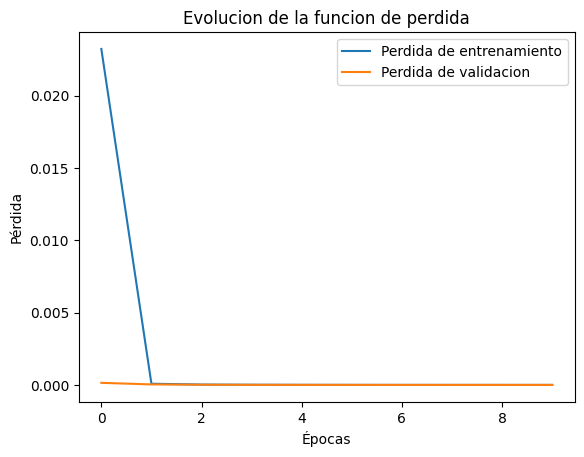

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 7.0458e-07

Perdida de test: 0.00| Acurrarcy:1.00


In [9]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Perdida de entrenamiento')
plt.plot(history.history['val_loss'], label='Perdida de validacion')
plt.xlabel('Épocas')
plt.ylabel('Pérdida')
plt.legend()
plt.title('Evolucion de la funcion de perdida')
plt.show()

loss, acc= modelo.evaluate(X_test, y_test)
print(f"\nPerdida de test: {loss:.2f}| Acurrarcy:{acc:.2f}")

Matriz de confusion

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step


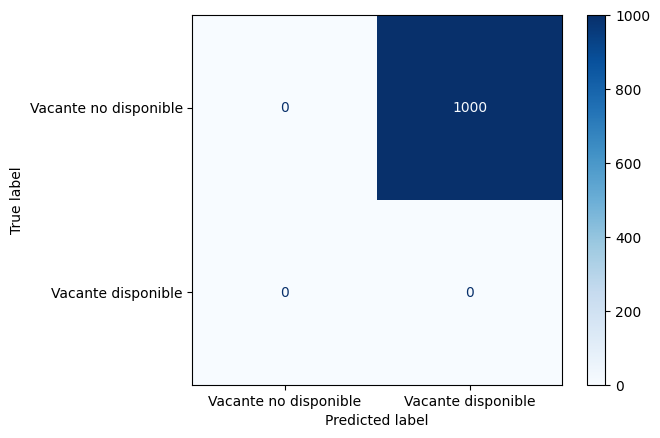


Sensitivity (Recall) por clase:
Vacante no disponible: 0.0000
Vacante disponible: 0.0000


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [8]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, recall_score

pred=modelo.predict(X_test)
y_pred=np.argmax(pred, axis=1)
y_true=np.argmax(y_test, axis=1)

cm=confusion_matrix(y_true, y_pred)
disp=ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Vacante no disponible','Vacante disponible'])
disp.plot(cmap='Blues')
plt.show()

sensitivity=recall_score(y_true, y_pred,average=None)
print("\nSensitivity (Recall) por clase:")
print(f"Vacante no disponible: {sensitivity[0]:.4f}")
print(f"Vacante disponible: {sensitivity[1]:.4f}")